In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Color설정
- 'c' vs 'color'
    - mapping을 하고싶으면 c
    - color값 자체를 넣고 싶으면 color 사용

결국은 colormap을 지원 하냐 안하냐고 중요

하지만 모든 플랏이 c를 가지고 있느것은 아니다 ex) 'Rectangle' object has no property 'c'. 얘네들은 칼라를 직접 명시하거나 color component들을 집어넣어주어야 한다

또 plt.plot 은 color c 둘다 가능은 한데 cmpa이 업다 결과적으로 그냥 color만 가능하다는 문맥적 의미다

c 인수가 있는경우는 colormap을 굳이 지정해주지 않아도 default로 colomap으로 알아서 mapping한다

AttributeError: 'Line2D' object has no property 'cmap'

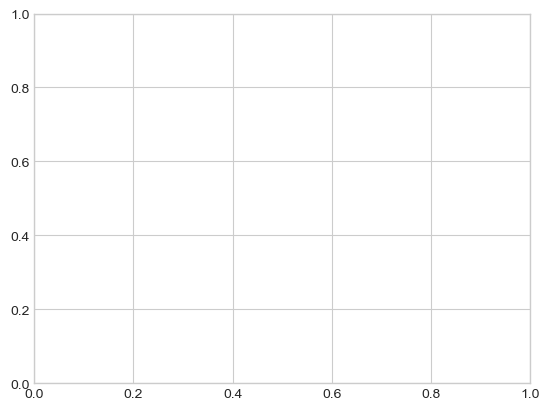

In [99]:
# error 'Line2D' object has no property 'cmap'
# scatter 처럼 그렸어도 Line2D object다
x = np.linspace(0,10,1000)
plt.plot(x,np.sin(x),':',cmap=plt.cm.get_cmap('viridis'))

ValueError: 'color' kwarg must be a color or sequence of color specs.  For a sequence of values to be color-mapped, use the 'c' argument instead.

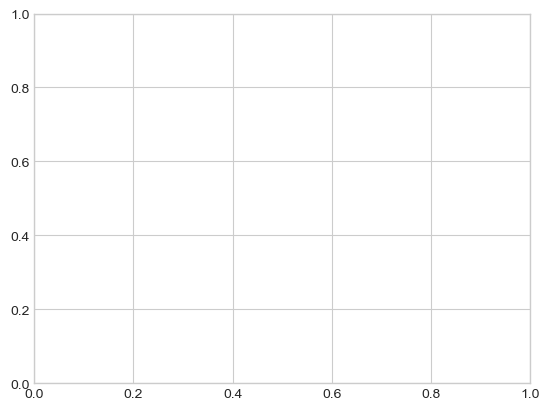

In [103]:
# error 'color' kwarg must be a color or sequence of color specs.  For a sequence of values to be color-mapped, use the 'c' argument instead.
x = np.random.randn(100)
y = np.random.randn(100)
colors = np.random.rand(100)

plt.scatter(x,y,color=colors,alpha=0.3)
plt.colorbar()

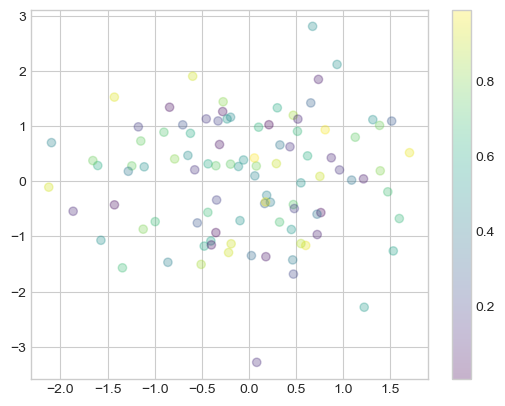

In [110]:
x = np.random.randn(100)
y = np.random.randn(100)
colors = np.random.rand(100)

plt.scatter(x,y,c=colors,alpha=0.3) # color만 넣어도 동작한다 # default가 viridis 같다
plt.colorbar()

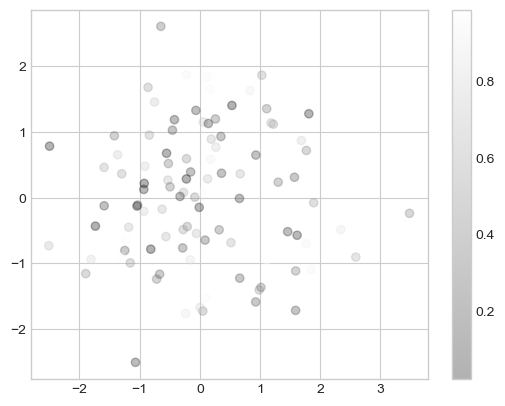

In [111]:
# plt.gray() 이런식으로도 cmap 설정가능하다 
# 한번 부르면 다른 그래프에도 적용되버린다 초기화 필요 => 다시 import 하던지 해라
x = np.random.randn(100)
y = np.random.randn(100)
colors = np.random.rand(100)

plt.scatter(x,y,c=colors,alpha=0.3) # color만 넣어도 동작한다 # default가 viridis 같다
plt.gray()
plt.colorbar()

### imshow() 함수를 통한 간단 cmap 비교

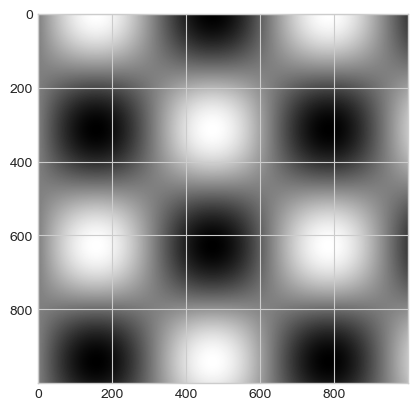

In [75]:
# imshow는 color 자체를 지정해줄 필요가 없이 Matrix 인수를 칼라로 인식한다
# 단지 colormap만 지정해주면 된다
x = np.linspace(0,10,1000)
I = (np.sin(x)*np.cos(x[:,np.newaxis]))
plt.imshow(I)

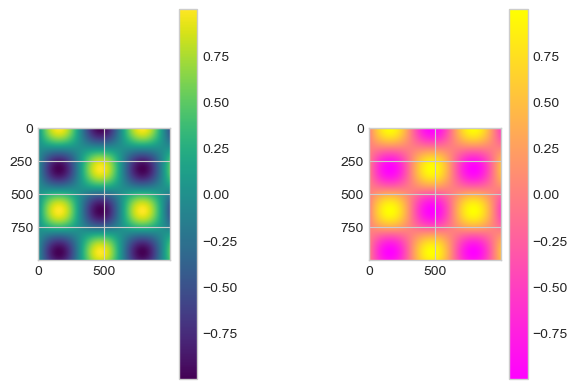

In [3]:
# colorbar 여러개 
x = np.linspace(0,10,1000)
I = (np.sin(x)*np.cos(x[:,np.newaxis]))
fig,ax = plt.subplots(1,2)
fig.subplots_adjust(wspace=1)
for i,cmap in enumerate(['viridis','spring']):
    im = ax[i].imshow(I,cmap=cmap)
    plt.colorbar(im,ax=ax[i]) # fig 아닌 선 점 같은 artis 객체, axes


### 어떤 colormap들이 있을까?

In [18]:
# plt.colormaps()를 통해 칼라맵 다 불러올수 있다
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

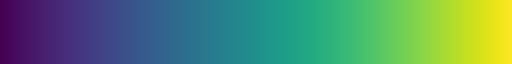

In [5]:
# viridis 자체에 cmap이 저장되어있다
viridis = plt.cm.get_cmap('viridis')
viridis

In [6]:
# 인수로 값 혹은 array집어 넣으면 색상들을 돌려준다
# rgba 형식으로 돌려준다
viridis(np.arange(1,100,10))

array([[0.26851 , 0.009605, 0.335427, 1.      ],
       [0.279566, 0.067836, 0.391917, 1.      ],
       [0.283229, 0.120777, 0.440584, 1.      ],
       [0.279574, 0.170599, 0.479997, 1.      ],
       [0.269308, 0.218818, 0.509577, 1.      ],
       [0.253935, 0.265254, 0.529983, 1.      ],
       [0.235526, 0.309527, 0.542944, 1.      ],
       [0.21621 , 0.351535, 0.550627, 1.      ],
       [0.197636, 0.391528, 0.554969, 1.      ],
       [0.180629, 0.429975, 0.557282, 1.      ]])

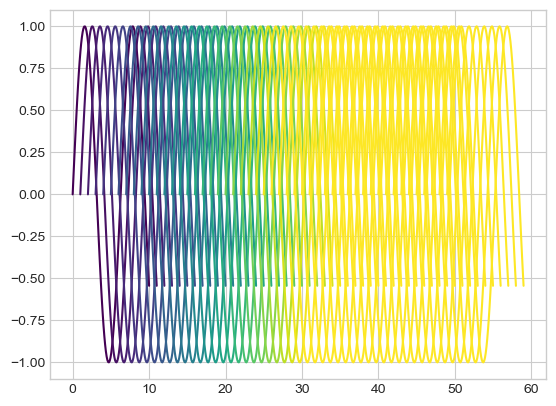

In [9]:
x = np.linspace(0,10,100)
for i,rgba in enumerate(viridis(np.arange(0,500,10))):
    plt.plot(x+i,np.sin(x),color=rgba)

    

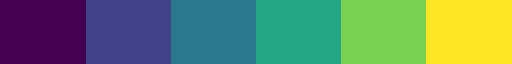

In [11]:
# 연속적인 칼라바가 아닌 끊겨있는 칼라바 가져온다
viridis_6 = plt.cm.get_cmap('viridis',6)
viridis_6

In [12]:
viridis_6(np.arange(1,1000,100))

array([[0.253935, 0.265254, 0.529983, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

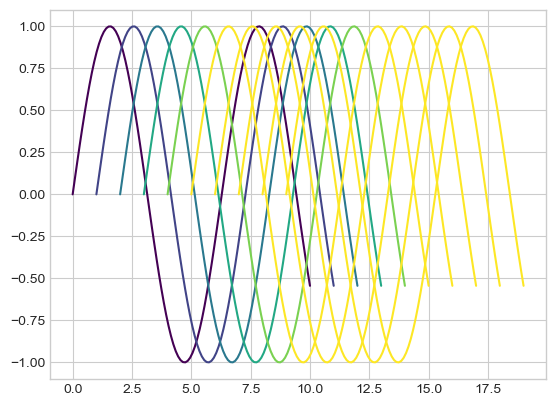

In [14]:
x = np.linspace(0,10,100)
for i,rgba in enumerate(viridis_6(np.arange(0,10,1))):
    plt.plot(x+i,np.sin(x),color=rgba)

### colorbar의 종류

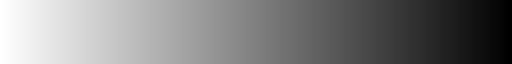

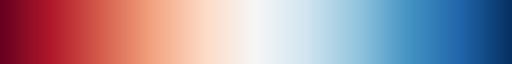

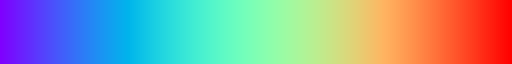

In [51]:
# 순차적
plt.cm.get_cmap('binary')

# 발산적 => 평균 기준으로 좌우 대칭
plt.cm.get_cmap('RdBu')

# 정성적 => random하게
plt.cm.get_cmap('rainbow')

<BarContainer object of 3 artists>

([<matplotlib.axis.XTick at 0x129724220>,
 [Text(0, 0, '2018'), Text(1, 0, '2019'), Text(2, 0, '2020')])

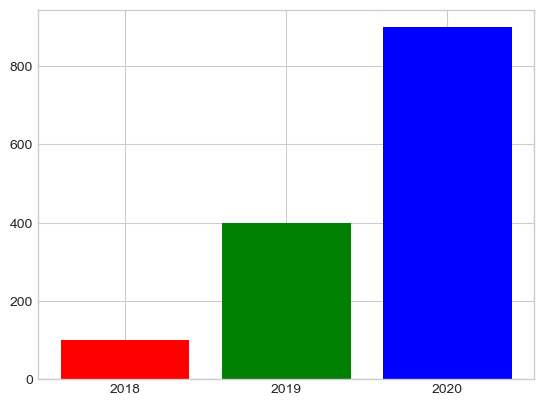

In [17]:
x = np.arange(3)
years = ['2018', '2019', '2020']
values = [100, 400, 900]
plt.bar(x, values ,color=['r','g','b'])
plt.xticks(x, years)

<BarContainer object of 3 artists>

([<matplotlib.axis.XTick at 0x1299610a0>,
 [Text(0, 0, '2018'), Text(1, 0, '2019'), Text(2, 0, '2020')])

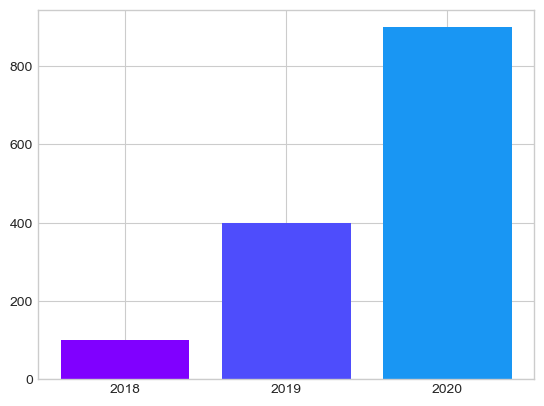

In [24]:
# pie  chart 색성 랜덤하게
# 이게 꼭 베스트는 아니다 그냥 이런게 있다라고 알아두자
x = np.arange(3)
years = ['2018', '2019', '2020']
values = [100, 400, 900]

cmap = plt.cm.get_cmap('rainbow')
def get_n_color(n,cmap=cmap):
    rand = np.arange(0,n,0.1)
    return cmap(rand)

plt.bar(x, values ,color=get_n_color(3))
plt.xticks(x, years)

plt.show()

### 내가 직접 만드는 colormap
- 아래 보면 감이 올거다

In [26]:
from matplotlib.colors import LinearSegmentedColormap
colormap = LinearSegmentedColormap.from_list('custom', 
                                       [(0, '#00ff00'),
                                        (0.5,'#0000FF'),
                                        (1,   '#ff0000')], N=10)

colormap(300) # return rgpa value

(1.0, 0.0, 0.0, 1.0)

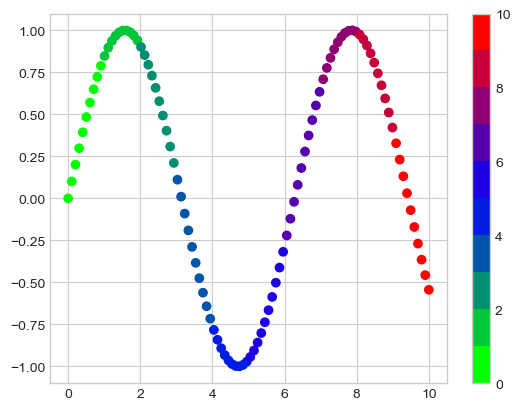

In [27]:
from matplotlib.colors import LinearSegmentedColormap
colormap = LinearSegmentedColormap.from_list('custom', 
                                       [(0, '#00ff00'),
                                        (0.5,'#0000FF'),
                                        (1,   '#ff0000')], N=10) #  colorbar의 총 구간이 10개 생성된걸 볼수 있다

x = np.linspace(0,10,100)
plt.scatter(x,np.sin(x),c=x,cmap=colormap)
plt.colorbar()

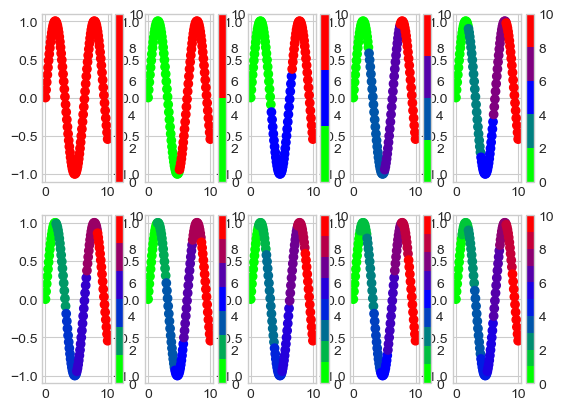

In [28]:
# N이 의미하는게 뭘까
# colorbar에서 구간을 잘 확인해보자
fig,ax = plt.subplots(2,5)

for i,ax in enumerate(ax.flat):
    colormap = LinearSegmentedColormap.from_list('custom', 
                                       [(0, '#00ff00'),
                                        (0.5,'#0000FF'),
                                        (1,   '#ff0000')], N=i+1)
    x = np.linspace(0,10,100)
    scatter = ax.scatter(x,np.sin(x),c=x,cmap=colormap)
    fig.colorbar(scatter,ax=ax)